## Importing and prepping data

In [1]:
import pandas as pd
import numpy as np
import diff_classifier.aws as aws
import diff_classifier.pca as pca

In [2]:
features = []
remote_folder = 'Gel_Studies/08_14_18_gel_validation' #Folder in AWS S3 containing files to be analyzed
bucket = 'ccurtis.data'
vids = 10
sizes = ['100', '200', '500']
nonnum = ['Particle Size', 'Video Number', 'Track_ID', 'Mean Mean_Intensity', 'Std Mean_Intensity']

counter = 0
for size in sizes:
    for num in range(1, vids+1):
        try:
            filename = 'features_{}nm_XY{}.csv'.format(size, '%02d' % num)
            aws.download_s3('{}/{}'.format(remote_folder, filename), filename, bucket_name='ccurtis.data')
            fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
            print('{} size: {}'.format(filename, fstats.shape))
            fstats['Particle Size'] = pd.Series(fstats.shape[0]*[size], index=fstats.index)
            fstats['Video Number'] = pd.Series(fstats.shape[0]*[num], index=fstats.index)
            counter = counter + 1
            if counter == 1:
                fstats_tot = fstats
            else:
                fstats_tot = fstats_tot.append(fstats, ignore_index=True)
        except:
            print('skip filename {}'.format(filename))

skip filename features_100nm_XY01.csv
features_100nm_XY02.csv size: (18207, 67)
features_100nm_XY03.csv size: (18178, 67)
features_100nm_XY04.csv size: (20452, 67)
features_100nm_XY05.csv size: (19292, 67)
skip filename features_100nm_XY06.csv
skip filename features_100nm_XY07.csv
skip filename features_100nm_XY08.csv
features_100nm_XY09.csv size: (21766, 67)
skip filename features_100nm_XY10.csv
features_200nm_XY01.csv size: (6072, 67)
features_200nm_XY02.csv size: (6483, 67)
features_200nm_XY03.csv size: (6513, 67)
features_200nm_XY04.csv size: (6412, 67)
features_200nm_XY05.csv size: (5249, 67)
features_200nm_XY06.csv size: (5248, 67)
features_200nm_XY07.csv size: (4674, 67)
features_200nm_XY08.csv size: (5585, 67)
features_200nm_XY09.csv size: (5700, 67)
features_200nm_XY10.csv size: (5198, 67)
features_500nm_XY01.csv size: (5325, 67)
features_500nm_XY02.csv size: (4709, 67)
features_500nm_XY03.csv size: (4125, 67)
features_500nm_XY04.csv size: (1606, 67)
features_500nm_XY05.csv si

In [ ]:
fstats_tot.to_csv('features.csv')

In [21]:
print(len(pcadataset.final.columns))
new = []
for test in pcadataset.final.columns:
    if test in nonnum or test in range(14):
        print('skipped')
    else:
        new.append(test)

83
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped


In [32]:
dataset = fstats_tot
dropcols=nonnum
imputenans=True
scale=True
rem_outliers=False
out_thresh=10
n_components=14

from sklearn.preprocessing import StandardScaler as stscale
from sklearn.preprocessing import Imputer

pd.options.mode.chained_assignment = None  # default='warn'
dataset_num = dataset.drop(dropcols, axis=1)

if rem_outliers:
    for i in range(10):
        for col in dataset_num.columns:
            xmean = np.mean(dataset_num[col])
            xstd = np.std(dataset_num[col])

            counter = 0
            for x in dataset_num[col]:
                if x > xmean + out_thresh*xstd:
                    dataset[col][counter] = np.nan
                    dataset_num[col][counter] = np.nan
                if x < xmean - out_thresh*xstd:
                    dataset[col][counter] = np.nan
                    dataset_num[col][counter] = np.nan
                counter = counter + 1

dataset_raw = dataset_num.values

# Fill in NaN values
if imputenans:
    imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
    imp.fit(dataset_raw)
    dataset_clean = imp.transform(dataset_raw)
else:
    dataset_clean = dataset_raw

# Scale inputs
if scale:
    scaler = stscale()
    scaler.fit(dataset_clean)
    dataset_scaled = scaler.transform(dataset_clean)
else:
    dataset_scaled = dataset_clean

In [43]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

In [48]:
for col in pcadataset.final.columns:
    print('Column {} Mean: {}'.format(col, np.nanmean(pcadataset.final[col])))

Column Track_ID Mean: 6218.973708763745
Column alpha Mean: 0.8887816049350988
Column D_fit Mean: 9.026733199191073
Column kurtosis Mean: 2.782252996601138
Column asymmetry1 Mean: 0.716721295962639
Column asymmetry2 Mean: 0.27286503078268104
Column asymmetry3 Mean: 0.25293904164850484
Column AR Mean: inf
Column elongation Mean: 0.4605538624159408
Column boundedness Mean: 0.047170125968458695
Column fractal_dim Mean: 1.8860276121713886
Column trappedness Mean: -0.21288146941732367
Column efficiency Mean: 0.7173392397292316
Column straightness Mean: 0.12888121197091318
Column MSD_ratio Mean: inf
Column frames Mean: 85.84034845527681
Column X Mean: 995.304869795094
Column Y Mean: 1036.5445455452614
Column Quality Mean: 15.51634289875129
Column Mean_Intensity Mean: 1477.4974422031316
Column SN_Ratio Mean: 0.7860235910180646
Column Deff1 Mean: 3.3747075980886088
Column Deff2 Mean: 2.0122518478546536
Column Mean alpha Mean: 0.8910634342279571
Column Std alpha Mean: 0.9082681684018
Column Mean

/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


AttributeError: 'str' object has no attribute 'dtype'

In [56]:
for i in range(64):
    j = i
    if i in [6]:
        j = i - 1
    print(' {} Raw: {}, Clean: {}'.format(i, dataset_raw[0, i], dataset_clean[0, i]))

 0 Raw: 0.10378427996423067, Clean: 0.10378427996423067
 1 Raw: 25.09785062583572, Clean: 25.09785062583572
 2 Raw: 2.088481185097605, Clean: 2.088481185097605
 3 Raw: 0.5114204465235525, Clean: 0.5114204465235525
 4 Raw: 0.4075387542689639, Clean: 0.4075387542689639
 5 Raw: 0.09275895342054297, Clean: 0.09275895342054297
 6 Raw: 1.7858435253516027, Clean: 0.4400405266171813
 7 Raw: 0.4400405266171813, Clean: 0.04307299039809385
 8 Raw: 0.04307299039809385, Clean: 1.99000365441762
 9 Raw: 1.99000365441762, Clean: -0.21407364877229207
 10 Raw: -0.21407364877229207, Clean: 0.04227822572279998
 11 Raw: 0.04227822572279998, Clean: 0.028690201827541208
 12 Raw: 0.028690201827541208, Clean: 81.0
 13 Raw: 0.390463331388213, Clean: 403.08553456648264
 14 Raw: 81.0, Clean: 1837.8961324608006
 15 Raw: 403.08553456648264, Clean: 15.267550998259134
 16 Raw: 1837.8961324608006, Clean: 1506.024893746111
 17 Raw: 15.267550998259134, Clean: 0.8363593101527098
 18 Raw: 1506.024893746111, Clean: 3.46228

IndexError: index 60 is out of bounds for axis 1 with size 60

In [45]:
dataset_clean = imp.transform(dataset_raw)

In [50]:
dataset_raw[:, 7]

array([ 0.44004053,  0.62608123,  0.34283276, ...,  0.72175908,
        0.62819051,  0.79802257])

In [ ]:
#PCA analyses with too many datapoints fail. You get rows with lots of NAs. I'm going to try making a subset of the data first
#and then do a PCA analysis on that.

#include all in analysis
import random
subset = np.sort(np.array(random.sample(range(fstats_tot.shape[0]), 500000)))
fstats_sub = fstats_tot.loc[subset, :].reset_index(drop=True)

In [5]:
#with equal sample sizes for each particle type
import random
counter = 0
for size in sizes:
    fstats_type = fstats_tot[fstats_tot['Particle Size']==size].reset_index(drop=True)
    print(fstats_type.shape)
    subset = np.sort(np.array(random.sample(range(fstats_type.shape[0]), 50000)))
    if counter == 0:
        fstats_sub = fstats_type.loc[subset, :].reset_index(drop=True)
    else:
        fstats_sub = fstats_sub.append(fstats_type.loc[subset, :].reset_index(drop=True), ignore_index=True)
    counter = counter + 1

(97895, 69)
(57134, 69)
(55041, 69)


In [6]:
#fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
fstats_num = fstats_sub.drop(nonnum, axis=1)
fstats_raw = fstats_num.as_matrix()
#fstats

In [13]:
pcadataset.scaled.shape

(210070, 60)

## PCA analysis

The pca.pca_analysis function provides a completely contained PCA analysis of the input trajectory features dataset. It includes options to impute NaN values (fill in with average values or drop them), and to scale features. Read the docstring for more information. 

In [7]:
pcadataset = pca.pca_analysis(fstats_tot, dropcols=nonnum, n_components=14)

Cumulative explained variance:
0 component: 0.2775260329883361
1 component: 0.39253304134530825
2 component: 0.4632619490135642
3 component: 0.5206911379824339
4 component: 0.5683081269120316
5 component: 0.6029276743359469
6 component: 0.6359895450316956
7 component: 0.6676818962775224
8 component: 0.6970654190792263
9 component: 0.723971262329111
10 component: 0.7459712743867822
11 component: 0.7654662987341796
12 component: 0.7845902081452764
13 component: 0.8025860491733566


In [25]:
pcadataset.components.shape

(60, 14)

In [27]:
pcadataset.scaled.shape

(210070, 60)

The pca.kmo function calculates the Kaiser-Meyer-Olkin statistic, a measure of sampling adequacy. Check the docstring for more information.

In [42]:
kmostat = pca.kmo(pcadataset.scaled)

0.911499774581


In [9]:
import scipy.stats as stat
stat.bartlett(pcadataset.scaled[0, :], pcadataset.scaled[1, :], pcadataset.scaled[2, :], pcadataset.scaled[3, :])

BartlettResult(statistic=37.099906357570319, pvalue=4.3827825738805206e-08)

In [22]:
newstr = ''
for i in range(pcadataset.scaled.shape[0]-1):
    newstr = newstr + 'pcadataset.scaled[{}, :], '.format(i)

newstr = 'stat.bartlett(' + newstr + 'pcadataset.scaled[{}, :])'.format(i+1)

In [23]:
test = eval(newstr)

SyntaxError: more than 255 arguments (<string>, line 1)

In [21]:
test

BartlettResult(statistic=1288.2159221182173, pvalue=2.8622214571018694e-158)

## Visualization

Users can then compare average principle component values between subgroups of the data. In this case, all particles were taken from the same sample, so there are no experimental subgroups. I chose to compare short trajectories to long trajectories, as I would expect differences between the two groups.

In [19]:
import numpy as np
ncomp = 14
dicti = {}
#test = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==200].as_matrix()), axis=0))[-6:]
#test1 = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==500].as_matrix()), axis=0))[-6:]
dicti[0] = np.nanmean(pcadataset.final[pcadataset.final['Particle Size']=='100'].values[:, -ncomp:], axis=0)
dicti[1] = np.nanmean(pcadataset.final[pcadataset.final['Particle Size']=='200'].values[:, -ncomp:], axis=0)
dicti[2] = np.nanmean(pcadataset.final[pcadataset.final['Particle Size']=='500'].values[:, -ncomp:], axis=0)

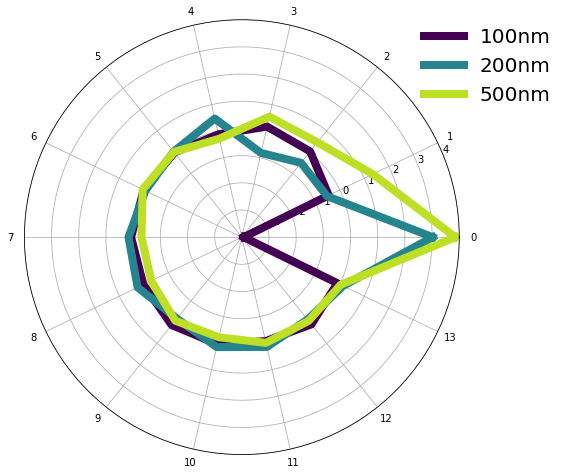

In [22]:
pca.plot_pca(dicti, savefig=True, labels=['100nm', '200nm', '500nm'], rticks=np.linspace(-4, 4, 9))

The variable pcadataset.prcomps shows the user the major contributions to each of the new principle components. When observing the graph above, users can see that there are some differences between short trajectories and long trajectories in component 0 (asymmetry1 being the major contributor) and component 1 (elongation being the major contributor).

In [18]:
pcadataset.prcomps

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Std trappedness,Std asymmetry3,Mean X,Std asymmetry1,Std asymmetry2,Mean MSD_ratio,Mean frames,Mean D_fit,D_fit,elongation,Mean boundedness,Mean elongation,kurtosis,Deff2
1,Std fractal_dim,Mean asymmetry2,fractal_dim,Std kurtosis,Mean AR,MSD_ratio,frames,Std D_fit,efficiency,fractal_dim,Mean straightness,Mean fractal_dim,Quality,Deff1
2,Mean Quality,Mean asymmetry1,elongation,Mean AR,Mean asymmetry3,frames,Mean MSD_ratio,kurtosis,straightness,alpha,Std straightness,Std efficiency,boundedness,Std efficiency
3,Std elongation,Mean kurtosis,Y,efficiency,Std asymmetry1,Mean frames,MSD_ratio,alpha,alpha,straightness,Std D_fit,Quality,Mean_Intensity,kurtosis
4,Std Quality,asymmetry3,asymmetry1,trappedness,Std kurtosis,straightness,Mean D_fit,Std straightness,MSD_ratio,Std D_fit,Std frames,Mean straightness,asymmetry1,D_fit


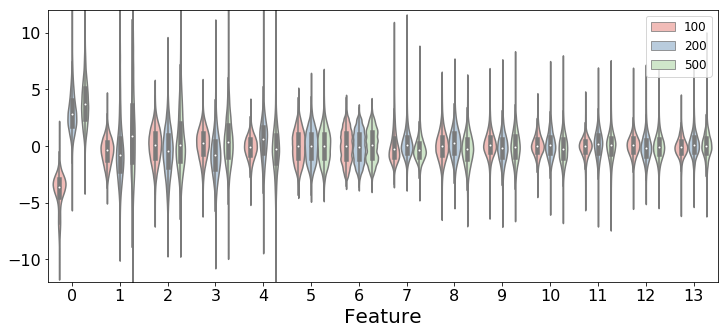

In [38]:
labels=['100', '200', '500']
feats = pca.feature_violin(pcadataset.final, label='Particle Size', lvals=labels, fsubset=14, yrange=[-12, 12])

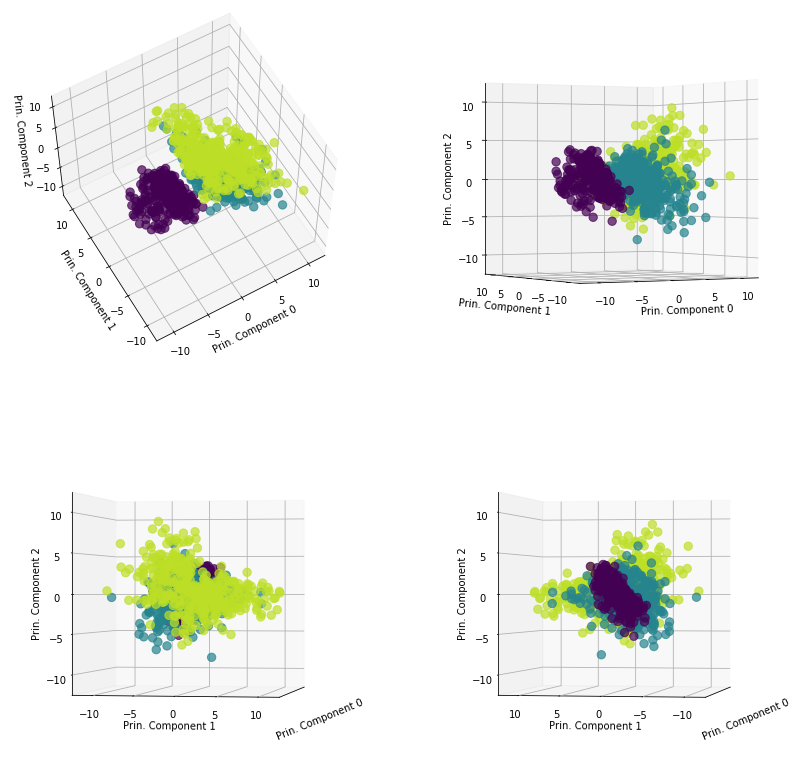

In [37]:
fstats1 = pca.feature_plot_3D(pcadataset.final, label='Particle Size', lvals=labels, randcount=400, ylim=[-12, 12],
                              xlim=[-12, 12], zlim=[-12, 12])

In [34]:
ncomp = 14
trainp = np.array([])
testp = np.array([])

for i in range(0, 20):
    KNNmod, X, y = pca.build_model(pcadataset.final, 'Particle Size', labels, equal_sampling=True,
                                       tsize=500, input_cols=ncomp, model='MLP', NNhidden_layer=(6, 2))
    trainp = np.append(trainp, pca.predict_model(KNNmod, X, y))
    
    X2 = pcadataset.final.values[:, -ncomp:]
    y2 = pcadataset.final['Particle Size'].values
    testp = np.append(testp, pca.predict_model(KNNmod, X2, y2))
    print('Run {}: {}'.format(i, testp[i]))

Run 0: 0.9134764602275433
Run 1: 0.9227543199885753
Run 2: 0.9180130432712905
Run 3: 0.9286047507973533
Run 4: 0.9213785880896844
Run 5: 0.9191031560908268
Run 6: 0.9217927357547484
Run 7: 0.9199933355548151
Run 8: 0.9159423049459704
Run 9: 0.9248060170419384
Run 10: 0.9206978626172229
Run 11: 0.9241157709334984
Run 12: 0.9170847812633884
Run 13: 0.9201218641405245
Run 14: 0.9212976626838673
Run 15: 0.9166896748702813
Run 16: 0.9142523920597896
Run 17: 0.9211262912362546
Run 18: 0.9184271909363545
Run 19: 0.9259437330413671


In [35]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

0.9373666666666667 +/ 0.00845767238796952
0.9202810967772649 +/ 0.0037597943997674105


In [41]:
fstats_num

,alpha,D_fit,kurtosis,asymmetry1,asymmetry2,asymmetry3,AR,elongation,boundedness,fractal_dim,...,Mean Y,Std Y,Mean Quality,Std Quality,Mean SN_Ratio,Std SN_Ratio,Mean Deff1,Std Deff1,Mean Deff2,Std Deff2
0,1.037843e-01,2.509785e+01,2.088481,0.511420,0.407539,0.092759,1.785844,0.440041,0.043073,1.990004,...,1845.568553,39.776907,12.932510,2.008608,0.741585,0.126458,5.107789,3.548895,3.256068,3.666727
1,1.116775e+00,3.850957e+00,3.258689,0.927007,0.137646,0.338687,2.674378,0.626081,0.021551,1.448342,...,1596.881221,34.963455,14.714267,5.315036,0.851210,0.335038,3.623264,2.578887,2.353706,3.164149
2,1.515761e+00,1.227798e+00,1.888773,0.918764,0.145528,0.326005,2.175150,0.540262,0.009925,1.510256,...,1735.869969,33.608255,12.683167,1.609289,0.752988,0.100960,5.678700,2.884642,6.444268,3.604846
3,1.528668e-02,1.442574e-01,4.233687,0.105988,0.713302,0.014100,1.530018,0.346413,0.048168,3.878428,...,1991.058550,36.450622,13.170601,2.161777,0.797954,0.131329,5.157226,2.810233,5.614364,5.696282
4,1.637299e-01,7.240210e+01,2.729562,0.908701,0.154694,0.311916,2.900917,0.655281,0.018023,1.444353,...,1734.151208,37.971408,13.349647,2.353731,0.748339,0.108757,5.686294,3.341169,5.799349,4.872543
5,1.560015e+00,2.839630e+00,2.640906,0.778888,0.249782,0.198655,1.750309,0.428672,0.030735,1.249953,...,1596.881221,34.963455,14.714267,5.315036,0.851210,0.335038,3.623264,2.578887,2.353706,3.164149
6,8.764861e-01,4.484071e+00,2.091916,0.192136,0.624899,0.027006,1.188844,0.158847,0.062629,1.892509,...,1850.010668,39.377763,12.710969,1.957069,0.759983,0.123425,5.021411,2.696067,1.750998,1.001093
7,6.703845e-01,8.188292e+00,3.242177,0.599856,0.356477,0.119382,1.128262,0.113681,0.037885,1.887483,...,1981.843526,38.476543,12.059202,1.737106,0.728688,0.108608,4.493839,3.261798,3.258261,5.129380
8,1.940602e-01,6.497823e-01,56.374155,0.044765,0.806684,0.005741,1.582655,0.368150,0.016767,1.978573,...,1981.843526,38.476543,12.059202,1.737106,0.728688,0.108608,4.493839,3.261798,3.258261,5.129380
9,1.666918e+00,3.970829e-01,1.992917,0.953796,0.108747,0.390200,3.881927,0.742396,0.050332,1.642037,...,1735.869969,33.608255,12.683167,1.609289,0.752988,0.100960,5.678700,2.884642,6.444268,3.604846
